#import the packages

In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [205]:
pd.set_option('display.max_columns',None)

#read the file (MoviesOnStreamingPlatforms_updated)

In [206]:
dt=pd.read_csv("MoviesOnStreamingPlatforms_updated.csv", index_col = 0)
dt=dt.drop(['ID'], axis = 1) 

In [207]:
dt

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney,Type,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,13+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,13+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,13+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,The Poof Point,2001,7+,4.7,NaN,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,NaN
16742,Man Among Cheetahs,2017,NaN,6.6,NaN,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,NaN


#display the number of rows

In [208]:
len(dt)

16744

#display the number of rows and columns

In [209]:
dt.shape

(16744, 15)

#display the datatype of data

In [210]:
dt.dtypes

Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney               int64
Type                 int64
Directors           object
Genres              object
Country             object
Language            object
Runtime            float64
dtype: object

#display the first five rows

In [211]:
dt.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney,Type,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,13+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,13+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,13+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


#display the last five rows

In [212]:
dt.tail(20)

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney,Type,Directors,Genres,Country,Language,Runtime
16724,Can of Worms,1999,7+,5.0,NaN,0,0,0,1,0,Paul Schneider,"Comedy,Family,Sci-Fi","United States,Canada",English,90.0
16725,My Dog the Thief,1969,NaN,6.1,NaN,0,0,0,1,0,Robert Stevenson,"Adventure,Drama,Family",United States,English,88.0
16726,Richie Rich's Christmas Wish,1998,all,4.1,NaN,0,0,0,1,0,John Murlowski,"Comedy,Family",United States,English,84.0
16727,The Jungle Book: Mowgli's Story,1998,all,4.2,NaN,0,0,0,1,0,Nick Marck,"Adventure,Family",United States,English,77.0
16728,How Dogs Got Their Shapes,2016,NaN,6.7,NaN,0,0,0,1,0,Keith Haskel,Documentary,United States,English,NaN
16729,Drain The Sunken Pirate City,2017,NaN,6.6,NaN,0,0,0,1,0,Sophie Elwin-Harris,Documentary,United Kingdom,English,47.0
16730,Bizarre Dinosaurs,2010,NaN,6.8,NaN,0,0,0,1,0,Jenny Kubo,Documentary,United States,English,48.0
16731,Earth Live,2017,NaN,5.5,NaN,0,0,0,1,0,Glenn Weiss,Documentary,United States,English,NaN
16732,The Boy Who Talked to Badgers,1975,NaN,6.2,NaN,0,0,0,1,0,Gary Nelson,"Adventure,Family",United States,English,89.0
16733,Sea of Hope: America's Underwater Treasures,2017,NaN,7.3,NaN,0,0,0,1,0,Robert Nixon,Documentary,United States,English,48.0


#display all the information

In [213]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16744 entries, 0 to 16743
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            16744 non-null  object 
 1   Year             16744 non-null  int64  
 2   Age              7354 non-null   object 
 3   IMDb             16173 non-null  float64
 4   Rotten Tomatoes  5158 non-null   object 
 5   Netflix          16744 non-null  int64  
 6   Hulu             16744 non-null  int64  
 7   Prime Video      16744 non-null  int64  
 8   Disney           16744 non-null  int64  
 9   Type             16744 non-null  int64  
 10  Directors        16018 non-null  object 
 11  Genres           16469 non-null  object 
 12  Country          16309 non-null  object 
 13  Language         16145 non-null  object 
 14  Runtime          16152 non-null  float64
dtypes: float64(2), int64(6), object(7)
memory usage: 2.0+ MB


#check for any duplicates value

In [214]:
dt.duplicated().sum

<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
16739    False
16740    False
16741    False
16742    False
16743    False
Length: 16744, dtype: bool>

In [215]:
duplicate=dt[dt.duplicated()]
duplicate

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney,Type,Directors,Genres,Country,Language,Runtime


In [216]:
dt_New=pd.DataFrame.drop_duplicates(dt)

In [217]:
dt_New.duplicated().sum()

0

#check for all null vlaues

In [218]:
dt.isnull().sum()

Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney                 0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

#Analysis of numeric columns only

In [219]:
dt.describe()

,Year,IMDb,Netflix,Hulu,Prime Video,Disney,Type,Runtime
count,16744.000000,16173.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.0,16152.000000
mean,2003.014035,5.902751,0.212613,0.053930,0.737817,0.033684,0.0,93.413447
std,20.674321,1.347867,0.409169,0.225886,0.439835,0.180419,0.0,28.219222
min,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,2000.000000,5.100000,0.000000,0.000000,0.000000,0.000000,0.0,82.000000
50%,2012.000000,6.100000,0.000000,0.000000,1.000000,0.000000,0.0,92.000000
75%,2016.000000,6.900000,0.000000,0.000000,1.000000,0.000000,0.0,104.000000
max,2020.000000,9.300000,1.000000,1.000000,1.000000,1.000000,0.0,1256.000000


Describe the numeric values

In [220]:
dt.describe(include=np.object)

,Title,Age,Rotten Tomatoes,Directors,Genres,Country,Language
count,16744,7354,5158,16018,16469,16309,16145
unique,16744,5,99,11338,1909,1303,1102
top,Inside the Law,18+,100%,Jay Chapman,Drama,United States,English
freq,1,3454,407,36,1341,8776,10955


count the value of Type

In [221]:
dt["Type"].value_counts()

0    16744
Name: Type, dtype: int64

#Availability of movies on Netflix

In [222]:
dt["Netflix"].value_counts()

0    13184
1     3560
Name: Netflix, dtype: int64

#Availability of movies on Hulu

In [223]:
dt["Hulu"].value_counts()

0    15841
1      903
Name: Hulu, dtype: int64

#Availability of movies on Prime Video

In [224]:
dt.rename(columns ={'Prime Video':'Prime'},inplace=True)

In [225]:
dt["Prime"].value_counts()

1    12354
0     4390
Name: Prime, dtype: int64

#Availability of movies on Disney+Hotstar

In [226]:
dt["Disney"].value_counts()

0    16180
1      564
Name: Disney, dtype: int64

#Drop the column(Rotten Tomatoes)

In [227]:
data=dt.drop(['Rotten Tomatoes','Type'],axis=1)

In [228]:
data

,Title,Year,Age,IMDb,Netflix,Hulu,Prime,Disney,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,13+,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,13+,8.5,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,13+,8.8,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,The Ghosts of Buxley Hall,1980,NaN,6.2,0,0,0,1,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,The Poof Point,2001,7+,4.7,0,0,0,1,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,Sharks of Lost Island,2013,NaN,5.7,0,0,0,1,Neil Gelinas,Documentary,United States,English,NaN
16742,Man Among Cheetahs,2017,NaN,6.6,0,0,0,1,Richard Slater-Jones,Documentary,United States,English,NaN


In [229]:
data.corr()

,Year,IMDb,Netflix,Hulu,Prime,Disney,Runtime
Year,1.000000,-0.021181,0.258533,0.098009,-0.253377,-0.046819,0.081984
IMDb,-0.021181,1.000000,0.135105,0.042191,-0.163447,0.075895,0.088987
Netflix,0.258533,0.135105,1.000000,-0.107911,-0.757215,-0.088927,0.099526
Hulu,0.098009,0.042191,-0.107911,1.000000,-0.255641,-0.034317,0.033985
Prime,-0.253377,-0.163447,-0.757215,-0.255641,1.000000,-0.298900,-0.067378
Disney,-0.046819,0.075895,-0.088927,-0.034317,-0.298900,1.000000,-0.019976
Runtime,0.081984,0.088987,0.099526,0.033985,-0.067378,-0.019976,1.000000


In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16744 entries, 0 to 16743
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Title      16744 non-null  object 
 1   Year       16744 non-null  int64  
 2   Age        7354 non-null   object 
 3   IMDb       16173 non-null  float64
 4   Netflix    16744 non-null  int64  
 5   Hulu       16744 non-null  int64  
 6   Prime      16744 non-null  int64  
 7   Disney     16744 non-null  int64  
 8   Directors  16018 non-null  object 
 9   Genres     16469 non-null  object 
 10  Country    16309 non-null  object 
 11  Language   16145 non-null  object 
 12  Runtime    16152 non-null  float64
dtypes: float64(2), int64(5), object(6)
memory usage: 1.8+ MB


#find a correlation of all columns in the data frame.

In [231]:
data.corr()

,Year,IMDb,Netflix,Hulu,Prime,Disney,Runtime
Year,1.000000,-0.021181,0.258533,0.098009,-0.253377,-0.046819,0.081984
IMDb,-0.021181,1.000000,0.135105,0.042191,-0.163447,0.075895,0.088987
Netflix,0.258533,0.135105,1.000000,-0.107911,-0.757215,-0.088927,0.099526
Hulu,0.098009,0.042191,-0.107911,1.000000,-0.255641,-0.034317,0.033985
Prime,-0.253377,-0.163447,-0.757215,-0.255641,1.000000,-0.298900,-0.067378
Disney,-0.046819,0.075895,-0.088927,-0.034317,-0.298900,1.000000,-0.019976
Runtime,0.081984,0.088987,0.099526,0.033985,-0.067378,-0.019976,1.000000


#Looking at the Age column

In [232]:
data['Age']

0        13+
1        13+
2        13+
3        13+
4        13+
        ... 
16739    NaN
16740     7+
16741    NaN
16742    NaN
16743    NaN
Name: Age, Length: 16744, dtype: object

#Counts the values of Age.

In [233]:
data["Age"].value_counts()

18+    3454
7+     1457
13+    1280
all     843
16+     320
Name: Age, dtype: int64

#checking the null value of Age

In [234]:
 data['Age'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
16739     True
16740    False
16741     True
16742     True
16743     True
Name: Age, Length: 16744, dtype: bool

In [235]:
data['Age'].isnull().values.any()

True

In [236]:
data['Age'].isnull().sum()

9390

In [237]:
values = data.values
data

,Title,Year,Age,IMDb,Netflix,Hulu,Prime,Disney,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,13+,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,13+,8.5,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,13+,8.8,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,The Ghosts of Buxley Hall,1980,NaN,6.2,0,0,0,1,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,The Poof Point,2001,7+,4.7,0,0,0,1,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,Sharks of Lost Island,2013,NaN,5.7,0,0,0,1,Neil Gelinas,Documentary,United States,English,NaN
16742,Man Among Cheetahs,2017,NaN,6.6,0,0,0,1,Richard Slater-Jones,Documentary,United States,English,NaN


display the 20 row's  value from the top of the column

In [238]:
data.Age.head(20)

0     13+
1     13+
2     13+
3     13+
4     13+
5     13+
6     13+
7     13+
8     13+
9     13+
10    13+
11    13+
12    13+
13    13+
14    13+
15    13+
16    13+
17    13+
18    13+
19    13+
Name: Age, dtype: object

In [239]:
data.Age.count()

7354

#checking the value of age is relected or not 

In [240]:
data.dropna(axis=0,how='any').shape

(7046, 13)

In [241]:
data.dropna(axis=0,how='any',inplace=True)

In [242]:
data['Age'] = data['Age'].replace(['all'],'18+')

In [243]:
data

,Title,Year,Age,IMDb,Netflix,Hulu,Prime,Disney,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,13+,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,13+,8.5,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,13+,8.8,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16726,Richie Rich's Christmas Wish,1998,18+,4.1,0,0,0,1,John Murlowski,"Comedy,Family",United States,English,84.0
16727,The Jungle Book: Mowgli's Story,1998,18+,4.2,0,0,0,1,Nick Marck,"Adventure,Family",United States,English,77.0
16737,The Bears and I,1974,18+,6.2,0,0,0,1,Bernard McEveety,"Drama,Family",United States,English,89.0
16738,Whispers: An Elephant's Tale,2000,18+,5.0,0,0,0,1,Dereck Joubert,"Adventure,Family",United States,English,72.0


In [244]:
data.dropna(subset=['Age'],how='all').shape

(7046, 13)

In [245]:
data['Age'].fillna(value='18')

0        13+
1        13+
2        13+
3        13+
4        13+
        ... 
16726    18+
16727    18+
16737    18+
16738    18+
16740     7+
Name: Age, Length: 7046, dtype: object

In [246]:
data

,Title,Year,Age,IMDb,Netflix,Hulu,Prime,Disney,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,13+,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,13+,8.5,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,13+,8.8,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16726,Richie Rich's Christmas Wish,1998,18+,4.1,0,0,0,1,John Murlowski,"Comedy,Family",United States,English,84.0
16727,The Jungle Book: Mowgli's Story,1998,18+,4.2,0,0,0,1,Nick Marck,"Adventure,Family",United States,English,77.0
16737,The Bears and I,1974,18+,6.2,0,0,0,1,Bernard McEveety,"Drama,Family",United States,English,89.0
16738,Whispers: An Elephant's Tale,2000,18+,5.0,0,0,0,1,Dereck Joubert,"Adventure,Family",United States,English,72.0


In [247]:
data['Age'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
16726    False
16727    False
16737    False
16738    False
16740    False
Name: Age, Length: 7046, dtype: bool

In [248]:
data['Age'].unique()

array(['13+', '7+', '18+', '16+'], dtype=object)

In [249]:
data.isnull()

,Title,Year,Age,IMDb,Netflix,Hulu,Prime,Disney,Directors,Genres,Country,Language,Runtime
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16726,False,False,False,False,False,False,False,False,False,False,False,False,False
16727,False,False,False,False,False,False,False,False,False,False,False,False,False
16737,False,False,False,False,False,False,False,False,False,False,False,False,False
16738,False,False,False,False,False,False,False,False,False,False,False,False,False


In [250]:
data.tail()

,Title,Year,Age,IMDb,Netflix,Hulu,Prime,Disney,Directors,Genres,Country,Language,Runtime
16726,Richie Rich's Christmas Wish,1998,18+,4.1,0,0,0,1,John Murlowski,"Comedy,Family",United States,English,84.0
16727,The Jungle Book: Mowgli's Story,1998,18+,4.2,0,0,0,1,Nick Marck,"Adventure,Family",United States,English,77.0
16737,The Bears and I,1974,18+,6.2,0,0,0,1,Bernard McEveety,"Drama,Family",United States,English,89.0
16738,Whispers: An Elephant's Tale,2000,18+,5.0,0,0,0,1,Dereck Joubert,"Adventure,Family",United States,English,72.0
16740,The Poof Point,2001,7+,4.7,0,0,0,1,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0


In [251]:
data.describe()

,Year,IMDb,Netflix,Hulu,Prime,Disney,Runtime
count,7046.000000,7046.000000,7046.000000,7046.000000,7046.000000,7046.000000,7046.000000
mean,2004.239285,5.847559,0.228357,0.080471,0.675703,0.069401,97.586858
std,15.796167,1.333326,0.419803,0.272041,0.468145,0.254153,21.929089
min,1902.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,1999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,87.000000
50%,2010.000000,6.000000,0.000000,0.000000,1.000000,0.000000,95.000000
75%,2015.000000,6.800000,0.000000,0.000000,1.000000,0.000000,106.000000
max,2020.000000,9.100000,1.000000,1.000000,1.000000,1.000000,260.000000


In [252]:
data.dtypes

Title         object
Year           int64
Age           object
IMDb         float64
Netflix        int64
Hulu           int64
Prime          int64
Disney         int64
Directors     object
Genres        object
Country       object
Language      object
Runtime      float64
dtype: object

top 10 rated movies according to IMDb

In [253]:
data.sort_values(by="IMDb",ascending=False).head(10)

,Title,Year,Age,IMDb,Netflix,Hulu,Prime,Disney,Directors,Genres,Country,Language,Runtime
7491,Finding Family,2013,13+,9.1,0,0,1,0,"Chris Leslie,Oggi Tomic","Documentary,Family,History,War","United Kingdom,Bosnia and Herzegovina","Bosnian,English",56.0
3560,The Dark Knight,2008,13+,9.0,0,1,0,0,Christopher Nolan,"Action,Crime,Drama,Thriller","United States,United Kingdom","English,Mandarin",152.0
4829,The Mountain II,2016,18+,8.9,0,0,1,0,Alper Caglar,"Action,Drama,War",Turkey,Turkish,135.0
6840,Peter Gabriel: Secret World Live,1993,18+,8.9,0,0,1,0,François Girard,"Documentary,Music",Canada,English,102.0
0,Inception,2010,13+,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
7643,Machine Gun Preacher Documentary,2014,16+,8.8,0,0,1,0,"Kevin Evans,Zac Simpson",Documentary,"United States,Australia",English,73.0
8247,Memories 677,2011,13+,8.8,0,0,1,0,"Kôji Morimoto,Tensai Okamura,Katsuhiro Ôtomo","Animation,Comedy,Fantasy,Horror,Sci-Fi,Thriller",Japan,"Japanese,English,Italian",113.0
4,"The Good, the Bad and the Ugly",1966,13+,8.8,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
9213,Street Dogs of South Central,2013,18+,8.8,0,0,1,0,Bill Marin,Documentary,United States,English,83.0
5153,Anand,1971,18+,8.7,0,0,1,0,Hrishikesh Mukherjee,"Drama,Musical",India,Hindi,122.0


how many movie are made in 2021 and have imdb >5

In [254]:
data[(data["IMDb"]>=5)&(data["Year"]==2020)].count()

Title        33
Year         33
Age          33
IMDb         33
Netflix      33
Hulu         33
Prime        33
Disney       33
Directors    33
Genres       33
Country      33
Language     33
Runtime      33
dtype: int64

how many age categories 

In [255]:
Ages=data.Age.unique()

In [256]:
Ages

array(['13+', '7+', '18+', '16+'], dtype=object)

In [257]:
Ages=data.groupby('Age').Title.count()

In [258]:
Ages

Age
13+    1217
16+     305
18+    4133
7+     1391
Name: Title, dtype: int64

IMDb(float to round)

In [259]:
data['IMDb'].round(decimals=0)

0        9.0
1        9.0
2        8.0
3        8.0
4        9.0
        ... 
16726    4.0
16727    4.0
16737    6.0
16738    5.0
16740    5.0
Name: IMDb, Length: 7046, dtype: float64

In [260]:
data.columns

Index(['Title', 'Year', 'Age', 'IMDb', 'Netflix', 'Hulu', 'Prime', 'Disney',
       'Directors', 'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')

target age group on the basis of video streamin platforms

to check relation between imdb and all other attributes

Text(0, 0.5, 'platform')

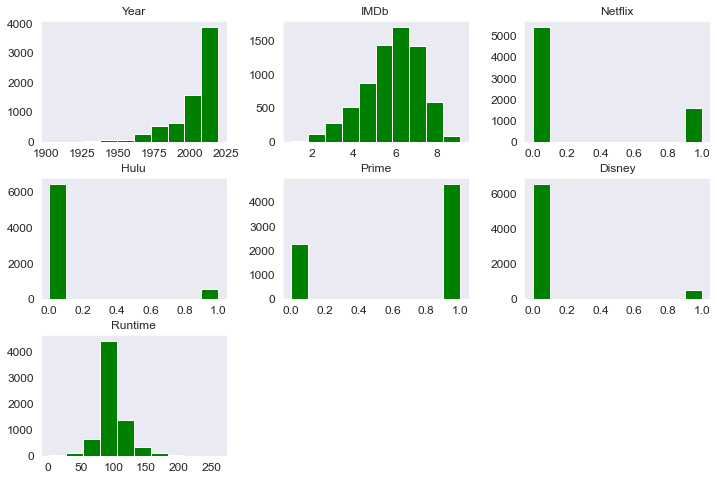

In [261]:
data.hist(grid=False, xlabelsize=12, ylabelsize=12,figsize=(12,8), color = "green")
plt.xlabel("IMDb", fontsize=15)
plt.ylabel("platform",fontsize=10)

In [262]:
data.corr()

,Year,IMDb,Netflix,Hulu,Prime,Disney,Runtime
Year,1.000000,-0.031937,0.268979,0.120874,-0.226294,-0.109429,0.024250
IMDb,-0.031937,1.000000,0.179462,0.076363,-0.238965,0.113032,0.204027
Netflix,0.268979,0.179462,1.000000,-0.138557,-0.666071,-0.137916,0.139845
Hulu,0.120874,0.076363,-0.138557,1.000000,-0.229738,-0.068469,0.014330
Prime,-0.226294,-0.238965,-0.666071,-0.229738,1.000000,-0.378683,-0.072729
Disney,-0.109429,0.113032,-0.137916,-0.068469,-0.378683,1.000000,-0.045231
Runtime,0.024250,0.204027,0.139845,0.014330,-0.072729,-0.045231,1.000000


In [263]:
r = data.sort_values(by='IMDb', ascending=False)
r = r[0:20]
r = r[['Title','IMDb','Netflix','Hulu','Prime','Disney']]
r.style.bar(subset=["Netflix",], color='#ff6b6b')\
                 .bar(subset=["Hulu"], color='#95d5b2')\
                 .bar(subset=["Prime"], color='#a2d2ff')\
                 .bar(subset=["Disney"], color='#72efdd')\
                 .bar(subset=["IMDb"],color='#').background_gradient(cmap='Purples')


,Title,IMDb,Netflix,Hulu,Prime,Disney
7491,Finding Family,9.100000,0,0,1,0
3560,The Dark Knight,9.000000,0,1,0,0
4829,The Mountain II,8.900000,0,0,1,0
6840,Peter Gabriel: Secret World Live,8.900000,0,0,1,0
0,Inception,8.800000,1,0,0,0
7643,Machine Gun Preacher Documentary,8.800000,0,0,1,0
8247,Memories 677,8.800000,0,0,1,0
4,"The Good, the Bad and the Ugly",8.800000,1,0,1,0
9213,Street Dogs of South Central,8.800000,0,0,1,0
5153,Anand,8.700000,0,0,1,0


Movies released Years.

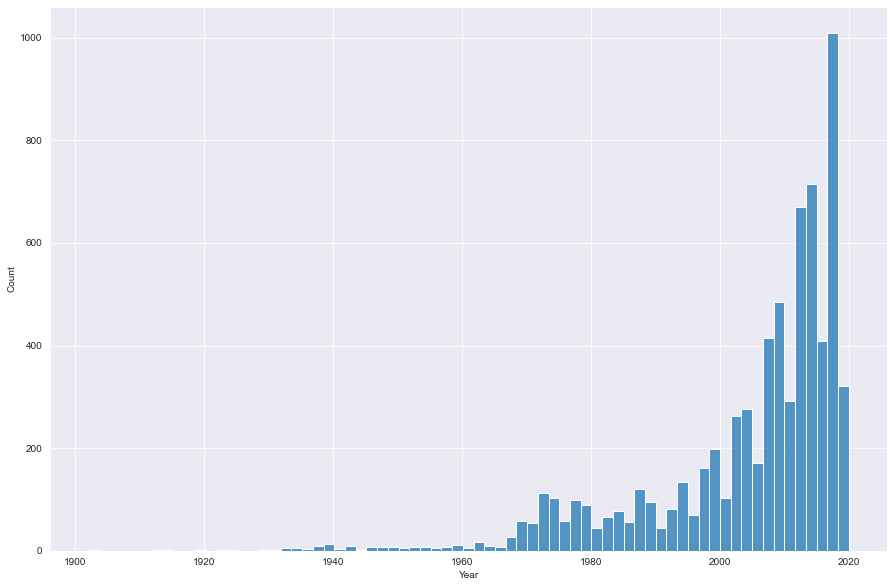

In [264]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
sns.histplot(data.Year,kde=False);

Here we can see that most of the movies released in 2020.

<AxesSubplot:title={'center':'Top Movie Languages on Streaming Services'}>

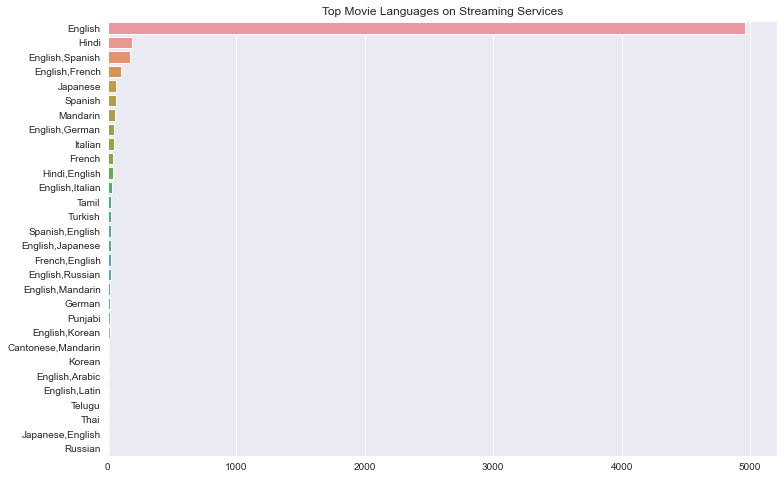

In [265]:
languages = data.Language.value_counts().head(30)

plt.figure(figsize=(12,8))
plt.title('Top Movie Languages on Streaming Services')
sns.barplot(x=languages.values, y=languages.index)

In [266]:
def split_multicolumn(genres):
    result_df = genres.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in genres[genres.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(','):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [267]:
genres_df = split_multicolumn(data.Genres)

movie_genres = genres_df.sum().sort_values(ascending=False)

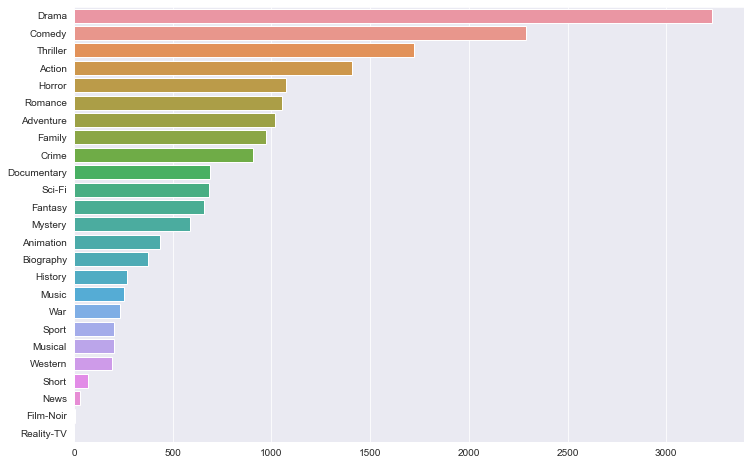

In [268]:
plt.figure(figsize=(12,8))
sns.barplot(x=movie_genres.values, y=movie_genres.index);

Here we vcan see that Drama,Comedy and Thriller are mostly watched by users.

 Q. Predicting which platform is most popular way to watch the movies.

In [269]:
selected_col =['Netflix','Prime', 'Disney','Hulu']
platforms_data = data[selected_col]

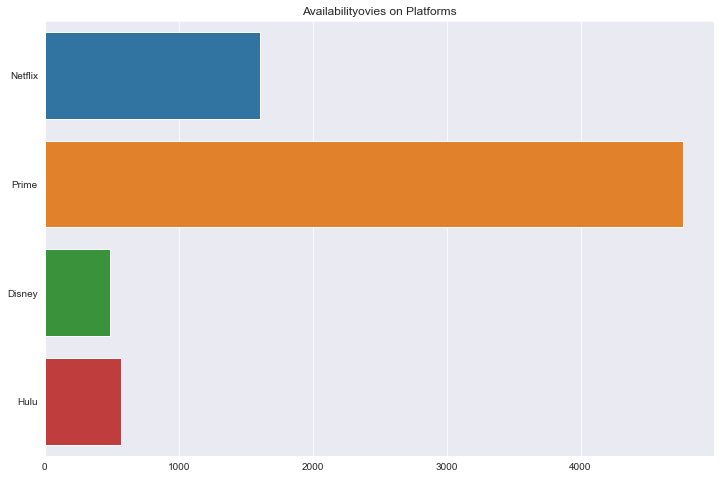

In [270]:
platforms = platforms_data.sum()

plt.figure(figsize=(12,8))
plt.title('Availabilityovies on Platforms')

sns.barplot(x=platforms.values, y=platforms.index);
plt.show()


Movie that have rating more than 8

In [271]:
data.head()

,Title,Year,Age,IMDb,Netflix,Hulu,Prime,Disney,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,13+,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,13+,8.5,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,13+,8.8,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


Creating dataframes for each platform

In [272]:
#dataframes
Hulu_data = data.loc[(data['Hulu'] > 0) ]
Disney_data = data.loc[(data['Disney'] > 0) ]
Prime_data = data.loc[(data['Prime'] > 0)  ]
Netflix_data = data.loc[(data['Netflix'] > 0)  ]

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\distributions.py:508: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], color=color, **plot_kws)
C:\Users\admin\Anaconda3\lib\site-packages\seaborn\distributions.py:554: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artists = plot_func(


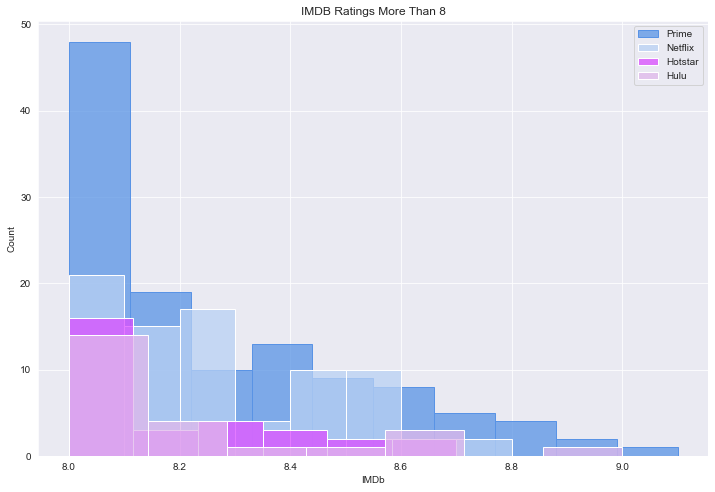

In [273]:
Prime_movie_rating = Prime_data.loc[(Prime_data['IMDb'] >= 8)] 
Netflix_movie_rating = Netflix_data.loc[(Netflix_data['IMDb'] >= 8) ]
Hotstar_movies_rating = Disney_data.loc[(Disney_data['IMDb'] >= 8)] 
Hulu_movie_rating = Hulu_data.loc[(Hulu_data['IMDb'] >= 8)]



plt.figure(figsize=(12,8))
plt.title('IMDB Ratings More Than 8')


sns.histplot(Prime_movie_rating['IMDb'], COLOR='#5993E5',kde=False)
sns.histplot(Netflix_movie_rating['IMDb'], color='#B9D1F4', kde=False)
sns.histplot(Hotstar_movies_rating['IMDb'], color='#DB4DFF', kde=False) 
sns.histplot(Hulu_movie_rating['IMDb'], color='#E0B8EB', kde=False)
                                      
                                      
plt.legend(['Prime', 'Netflix', 'Hotstar', 'Hulu'])
plt.show()

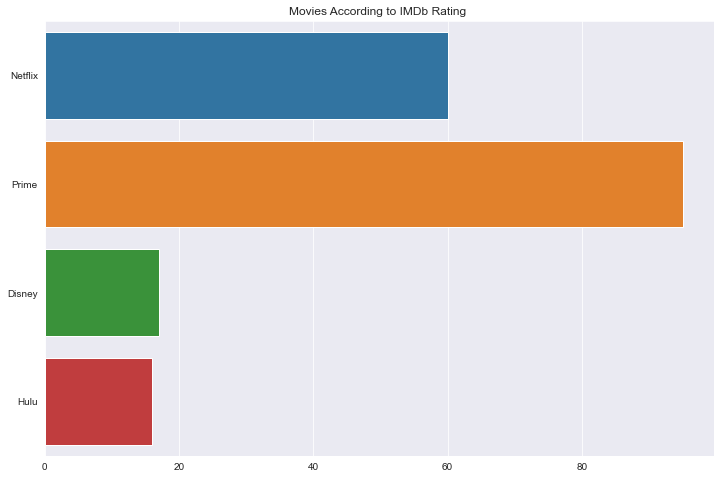

In [274]:
movie_rating_data = data.loc[data.IMDb >8]

movie_rating = movie_rating_data[selected_col].sum()


plt.figure(figsize=(12,8))
plt.title('Movies According to IMDb Rating ')
sns.barplot(x=movie_rating.values, y=movie_rating.index)
plt.show()

Here we can clearly see that prime has more number of movies than Netflix,Hotstar and also Prime has high number of rating than other Platforms.

Algorithm(Decision Tree)

In [275]:
data['Netflix'].value_counts()

0    5437
1    1609
Name: Netflix, dtype: int64

In [276]:
data['Prime'].value_counts()

1    4761
0    2285
Name: Prime, dtype: int64

In [277]:
data['Disney'].value_counts()

0    6557
1     489
Name: Disney, dtype: int64

In [278]:
data['Hulu'].value_counts()

0    6479
1     567
Name: Hulu, dtype: int64

In [279]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()

In [280]:
data['Genres']=number.fit_transform(data['Genres']).astype('int')
data

,Title,Year,Age,IMDb,Netflix,Hulu,Prime,Disney,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,1,0,0,0,Christopher Nolan,121,"United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,13+,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski",272,United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Anthony Russo,Joe Russo",120,United States,English,149.0
3,Back to the Future,1985,13+,8.5,1,0,0,0,Robert Zemeckis,341,United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,13+,8.8,1,0,1,0,Sergio Leone,1203,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16726,Richie Rich's Christmas Wish,1998,18+,4.1,0,0,0,1,John Murlowski,738,United States,English,84.0
16727,The Jungle Book: Mowgli's Story,1998,18+,4.2,0,0,0,1,Nick Marck,378,United States,English,77.0
16737,The Bears and I,1974,18+,6.2,0,0,0,1,Bernard McEveety,984,United States,English,89.0
16738,Whispers: An Elephant's Tale,2000,18+,5.0,0,0,0,1,Dereck Joubert,378,United States,English,72.0


In [281]:
train, test = train_test_split(data, test_size =0.35)

In [282]:
train.shape

(4579, 13)

In [283]:
test.shape

(2467, 13)

In [339]:
c1 = DecisionTreeClassifier(min_samples_split=100)
c2 = DecisionTreeClassifier(min_samples_split=100)

In [340]:
features = [ 'IMDb','Genres'] 

Setting targe=Netflix

In [341]:
X_train = train[features]
y_train = train['Netflix']

X_test = test[features]
y_test = test['Netflix']

In [342]:
tree1 = c1.fit(X_train, y_train)
tree2 = c2.fit(X_train, y_train)

In [343]:
y_pred_t1 = c1.predict(X_train)
y_pred_t2 = c2.predict(X_train)

In [344]:
y_pred1 = c1.predict(X_test)
y_pred2 = c2.predict(X_test)

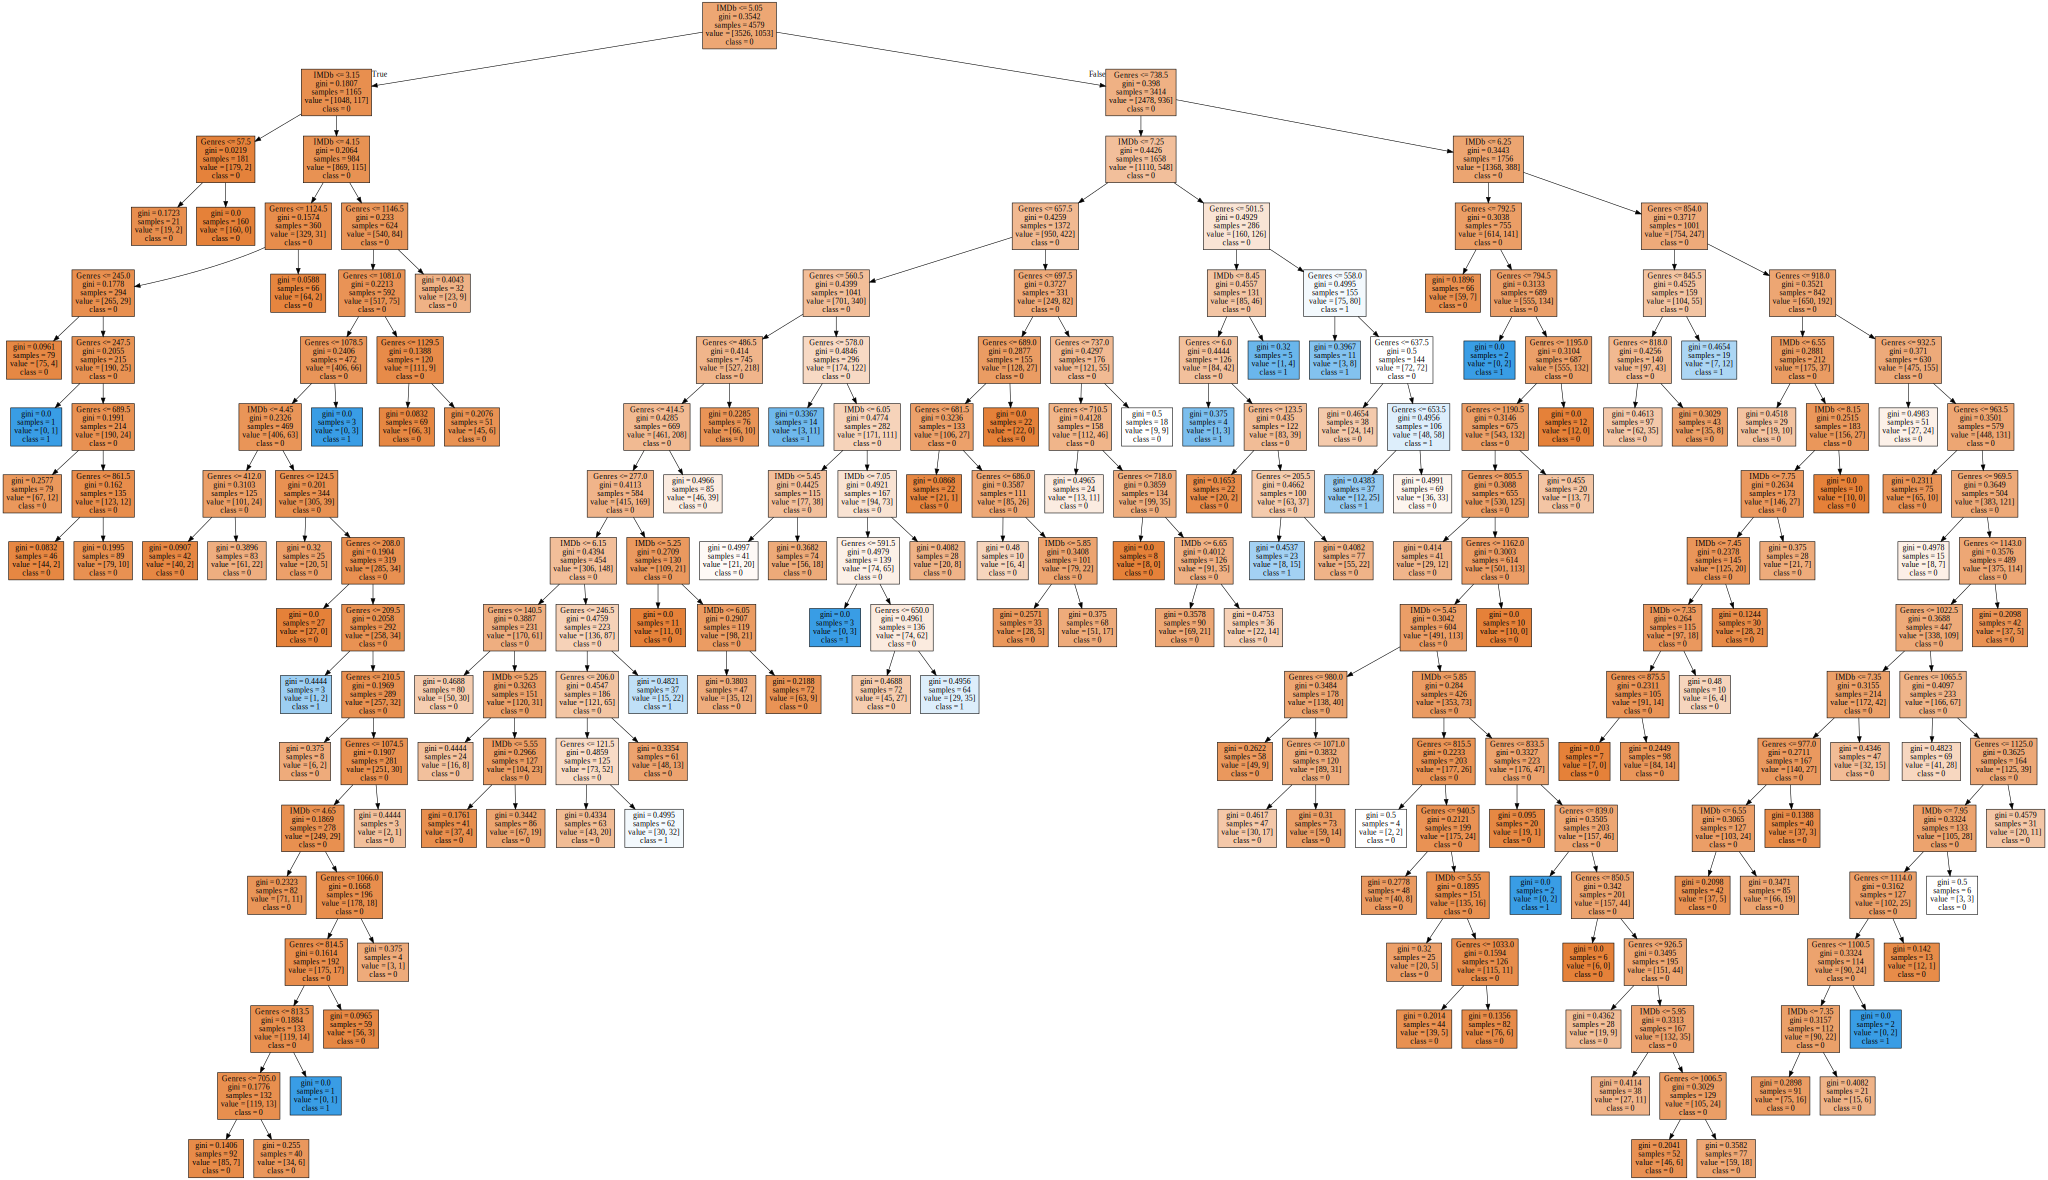

In [345]:
dot_data = tree.export_graphviz(tree1,feature_names = X_train.columns,class_names=["0","1"], filled=True, precision=4)
graph = graphviz.Source(dot_data, format="png") 
graph

In [346]:
from sklearn.metrics import accuracy_score

In [347]:
train_score_1 = accuracy_score(y_train, y_pred_t1)*100
train_score_1

78.59794715003275

In [348]:
train_score_2 = accuracy_score(y_train, y_pred_t2)*100
train_score_2

78.59794715003275

In [349]:
test_score_1 = accuracy_score(y_test, y_pred1)*100
test_score_1

75.67896230239157

In [350]:
test_score_2 = accuracy_score(y_test, y_pred2)*100
test_score_2

75.67896230239157

In [351]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86      1911
           1       0.35      0.10      0.15       556

    accuracy                           0.76      2467
   macro avg       0.57      0.52      0.50      2467
weighted avg       0.69      0.76      0.70      2467



In [352]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86      1911
           1       0.35      0.10      0.15       556

    accuracy                           0.76      2467
   macro avg       0.57      0.52      0.50      2467
weighted avg       0.69      0.76      0.70      2467



In [353]:
cm1 = confusion_matrix(y_test, y_pred1)
cm1

array([[1814,   97],
       [ 503,   53]], dtype=int64)

Setting target as Prime

In [354]:
X_train = train[features]
y_train = train['Prime']

X_test = test[features]
y_test = test['Prime']

In [355]:
tree1 = c1.fit(X_train, y_train)
tree2 = c2.fit(X_train, y_train)

In [356]:
y_pred_t1 = c1.predict(X_train)
y_pred_t2 = c2.predict(X_train)

In [357]:
y_pred1 = c1.predict(X_test)
y_pred2 = c2.predict(X_test)

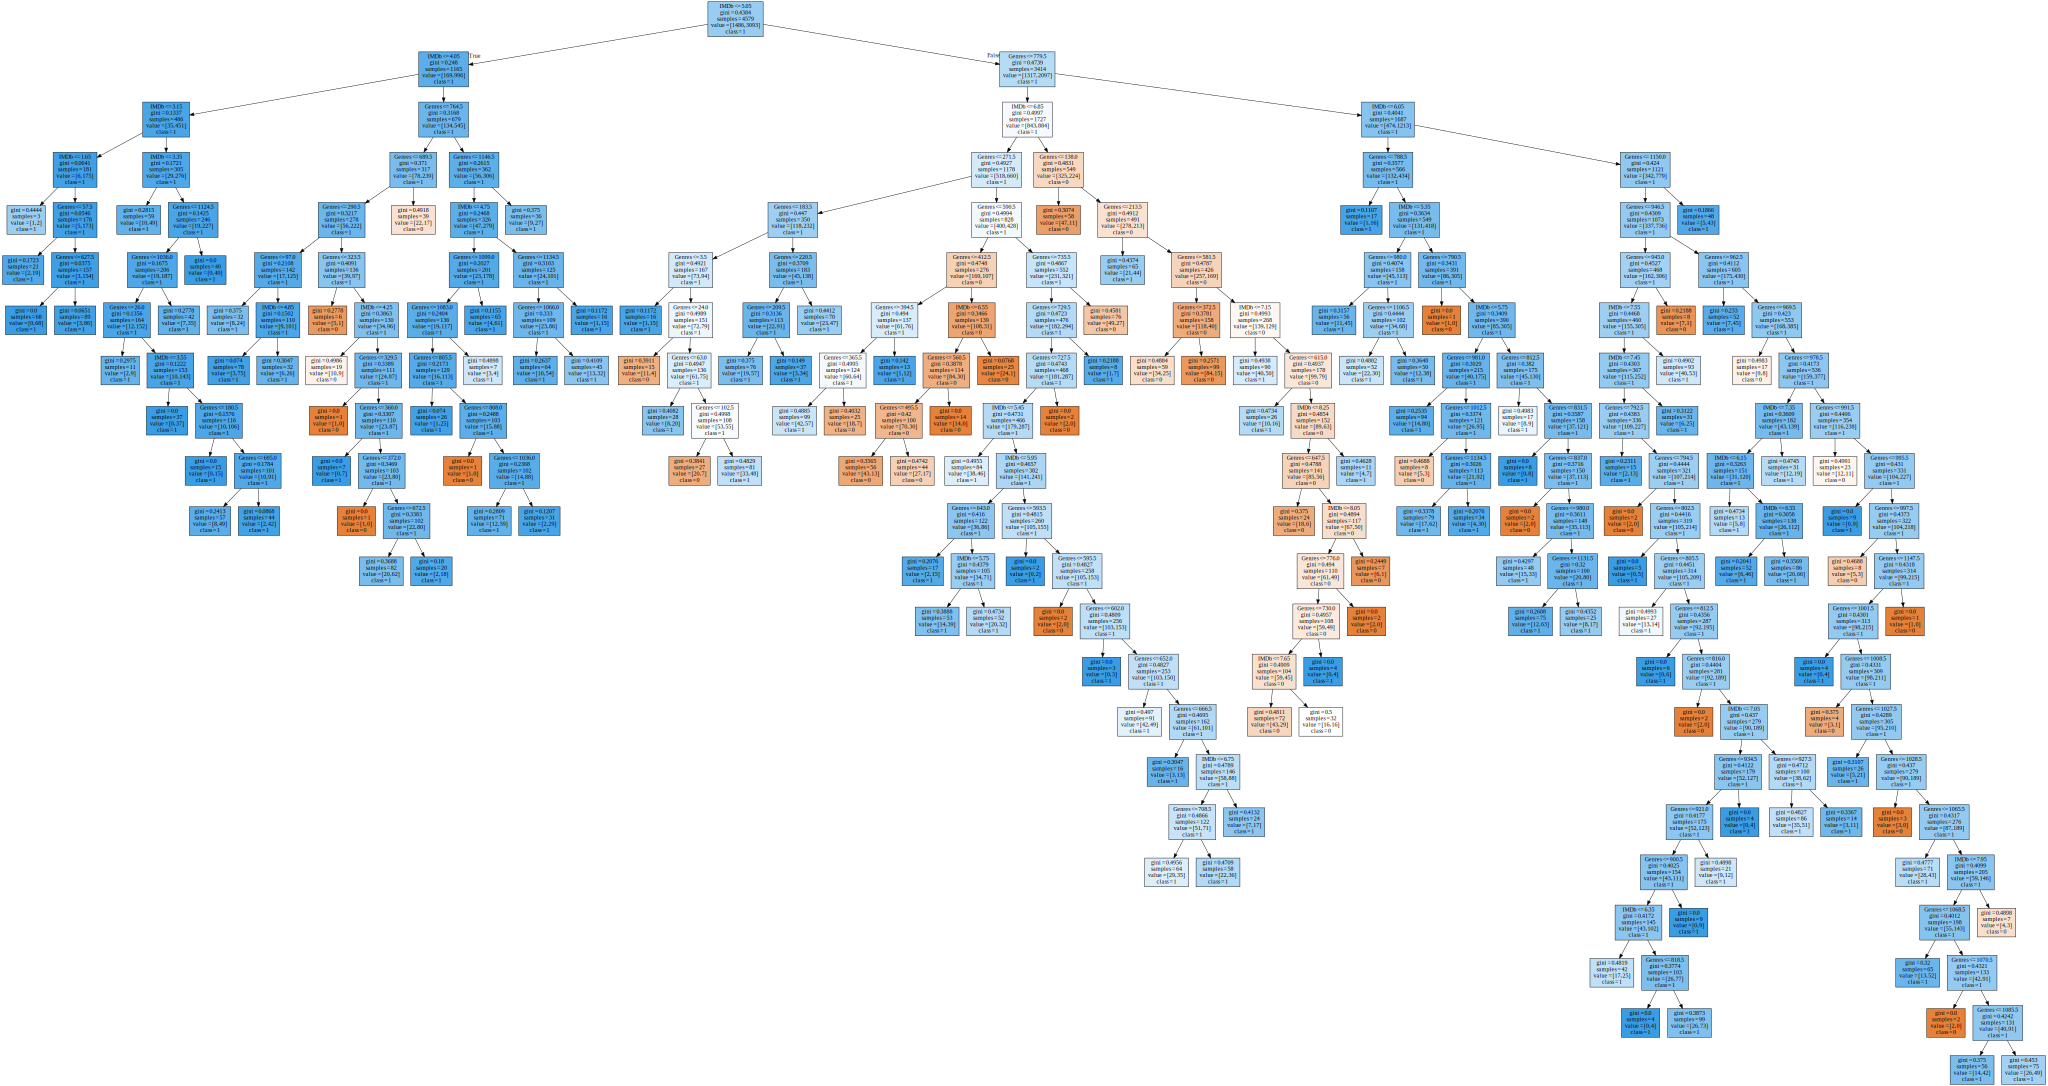

In [358]:
dot_data = tree.export_graphviz(tree1,feature_names = X_train.columns,class_names=["0","1"], filled=True, precision=4)
graph = graphviz.Source(dot_data, format="png") 
graph

In [359]:
train_score_1 = accuracy_score(y_train, y_pred_t1)*100
train_score_1

74.57960253330421

In [360]:
train_score_2 = accuracy_score(y_train, y_pred_t2)*100
train_score_2

74.57960253330421

In [361]:
test_score_1 = accuracy_score(y_test, y_pred1)*100
test_score_1

70.7336846372112

In [362]:
test_score_2 = accuracy_score(y_test, y_pred2)*100
test_score_2

70.7336846372112

In [363]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.59      0.33      0.42       799
           1       0.73      0.89      0.80      1668

    accuracy                           0.71      2467
   macro avg       0.66      0.61      0.61      2467
weighted avg       0.69      0.71      0.68      2467



In [364]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.59      0.33      0.42       799
           1       0.73      0.89      0.80      1668

    accuracy                           0.71      2467
   macro avg       0.66      0.61      0.61      2467
weighted avg       0.69      0.71      0.68      2467



In [310]:
cm1 = confusion_matrix(y_test, y_pred1)
cm1

array([[ 240,  559],
       [ 163, 1505]], dtype=int64)

Set target as Hotstar

In [365]:
c1 = DecisionTreeClassifier(min_samples_split=100)
c2 = DecisionTreeClassifier(min_samples_split=100)

In [366]:
features = [ 'IMDb','Genres'] 

In [367]:
X_train = train[features]
y_train = train['Disney']

X_test = test[features]
y_test = test['Disney']

In [368]:
tree1 = c1.fit(X_train, y_train)
tree2 = c2.fit(X_train, y_train)

In [369]:
y_pred_t1 = c1.predict(X_train)
y_pred_t2 = c2.predict(X_train)

In [370]:
y_pred1 = c1.predict(X_test)
y_pred2 = c2.predict(X_test)

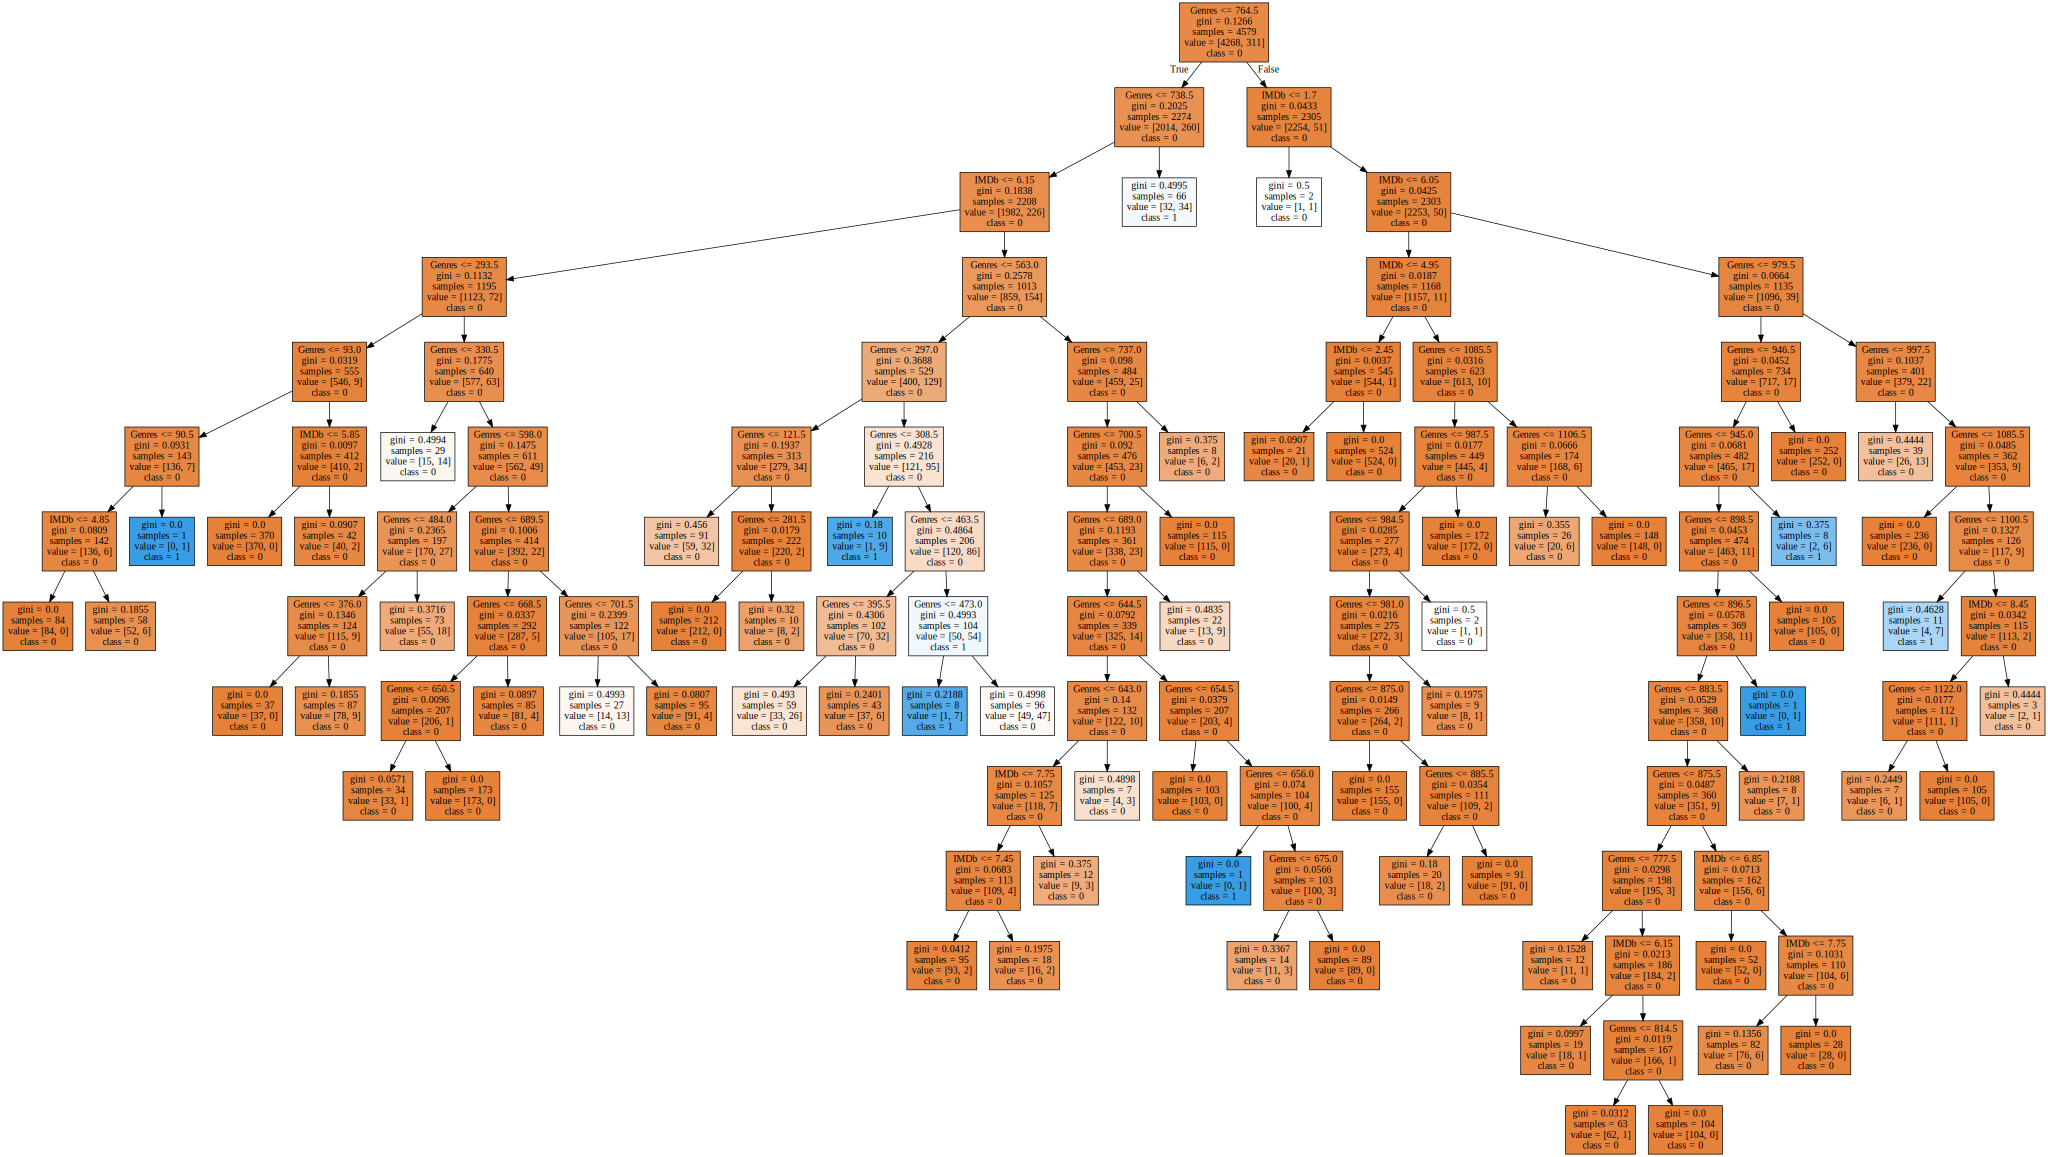

In [371]:
dot_data = tree.export_graphviz(tree1,feature_names = X_train.columns,class_names=["0","1"], filled=True, precision=4)
graph = graphviz.Source(dot_data, format="png") 
graph

In [372]:
train_score_1 = accuracy_score(y_train, y_pred_t1)*100
train_score_1

93.7759336099585

In [373]:
train_score_2 = accuracy_score(y_train, y_pred_t2)*100
train_score_2

93.7759336099585

In [374]:
test_score_1 = accuracy_score(y_test, y_pred1)*100
test_score_1

92.70368869071747

In [375]:
test_score_2 = accuracy_score(y_test, y_pred2)*100
test_score_2

92.70368869071747

In [376]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2289
           1       0.49      0.19      0.27       178

    accuracy                           0.93      2467
   macro avg       0.71      0.59      0.61      2467
weighted avg       0.91      0.93      0.91      2467



In [377]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2289
           1       0.49      0.19      0.27       178

    accuracy                           0.93      2467
   macro avg       0.71      0.59      0.61      2467
weighted avg       0.91      0.93      0.91      2467



In [378]:
cm1 = confusion_matrix(y_test, y_pred1)
cm1

array([[2254,   35],
       [ 145,   33]], dtype=int64)

set target set as Hulu

In [379]:
X_train = train[features]
y_train = train['Hulu']

X_test = test[features]
y_test = test['Hulu']

In [380]:
tree1 = c1.fit(X_train, y_train)
tree2 = c2.fit(X_train, y_train)

In [381]:
y_pred_t1 = c1.predict(X_train)
y_pred_t2 = c2.predict(X_train)

In [382]:
y_pred1 = c1.predict(X_test)
y_pred2 = c2.predict(X_test)

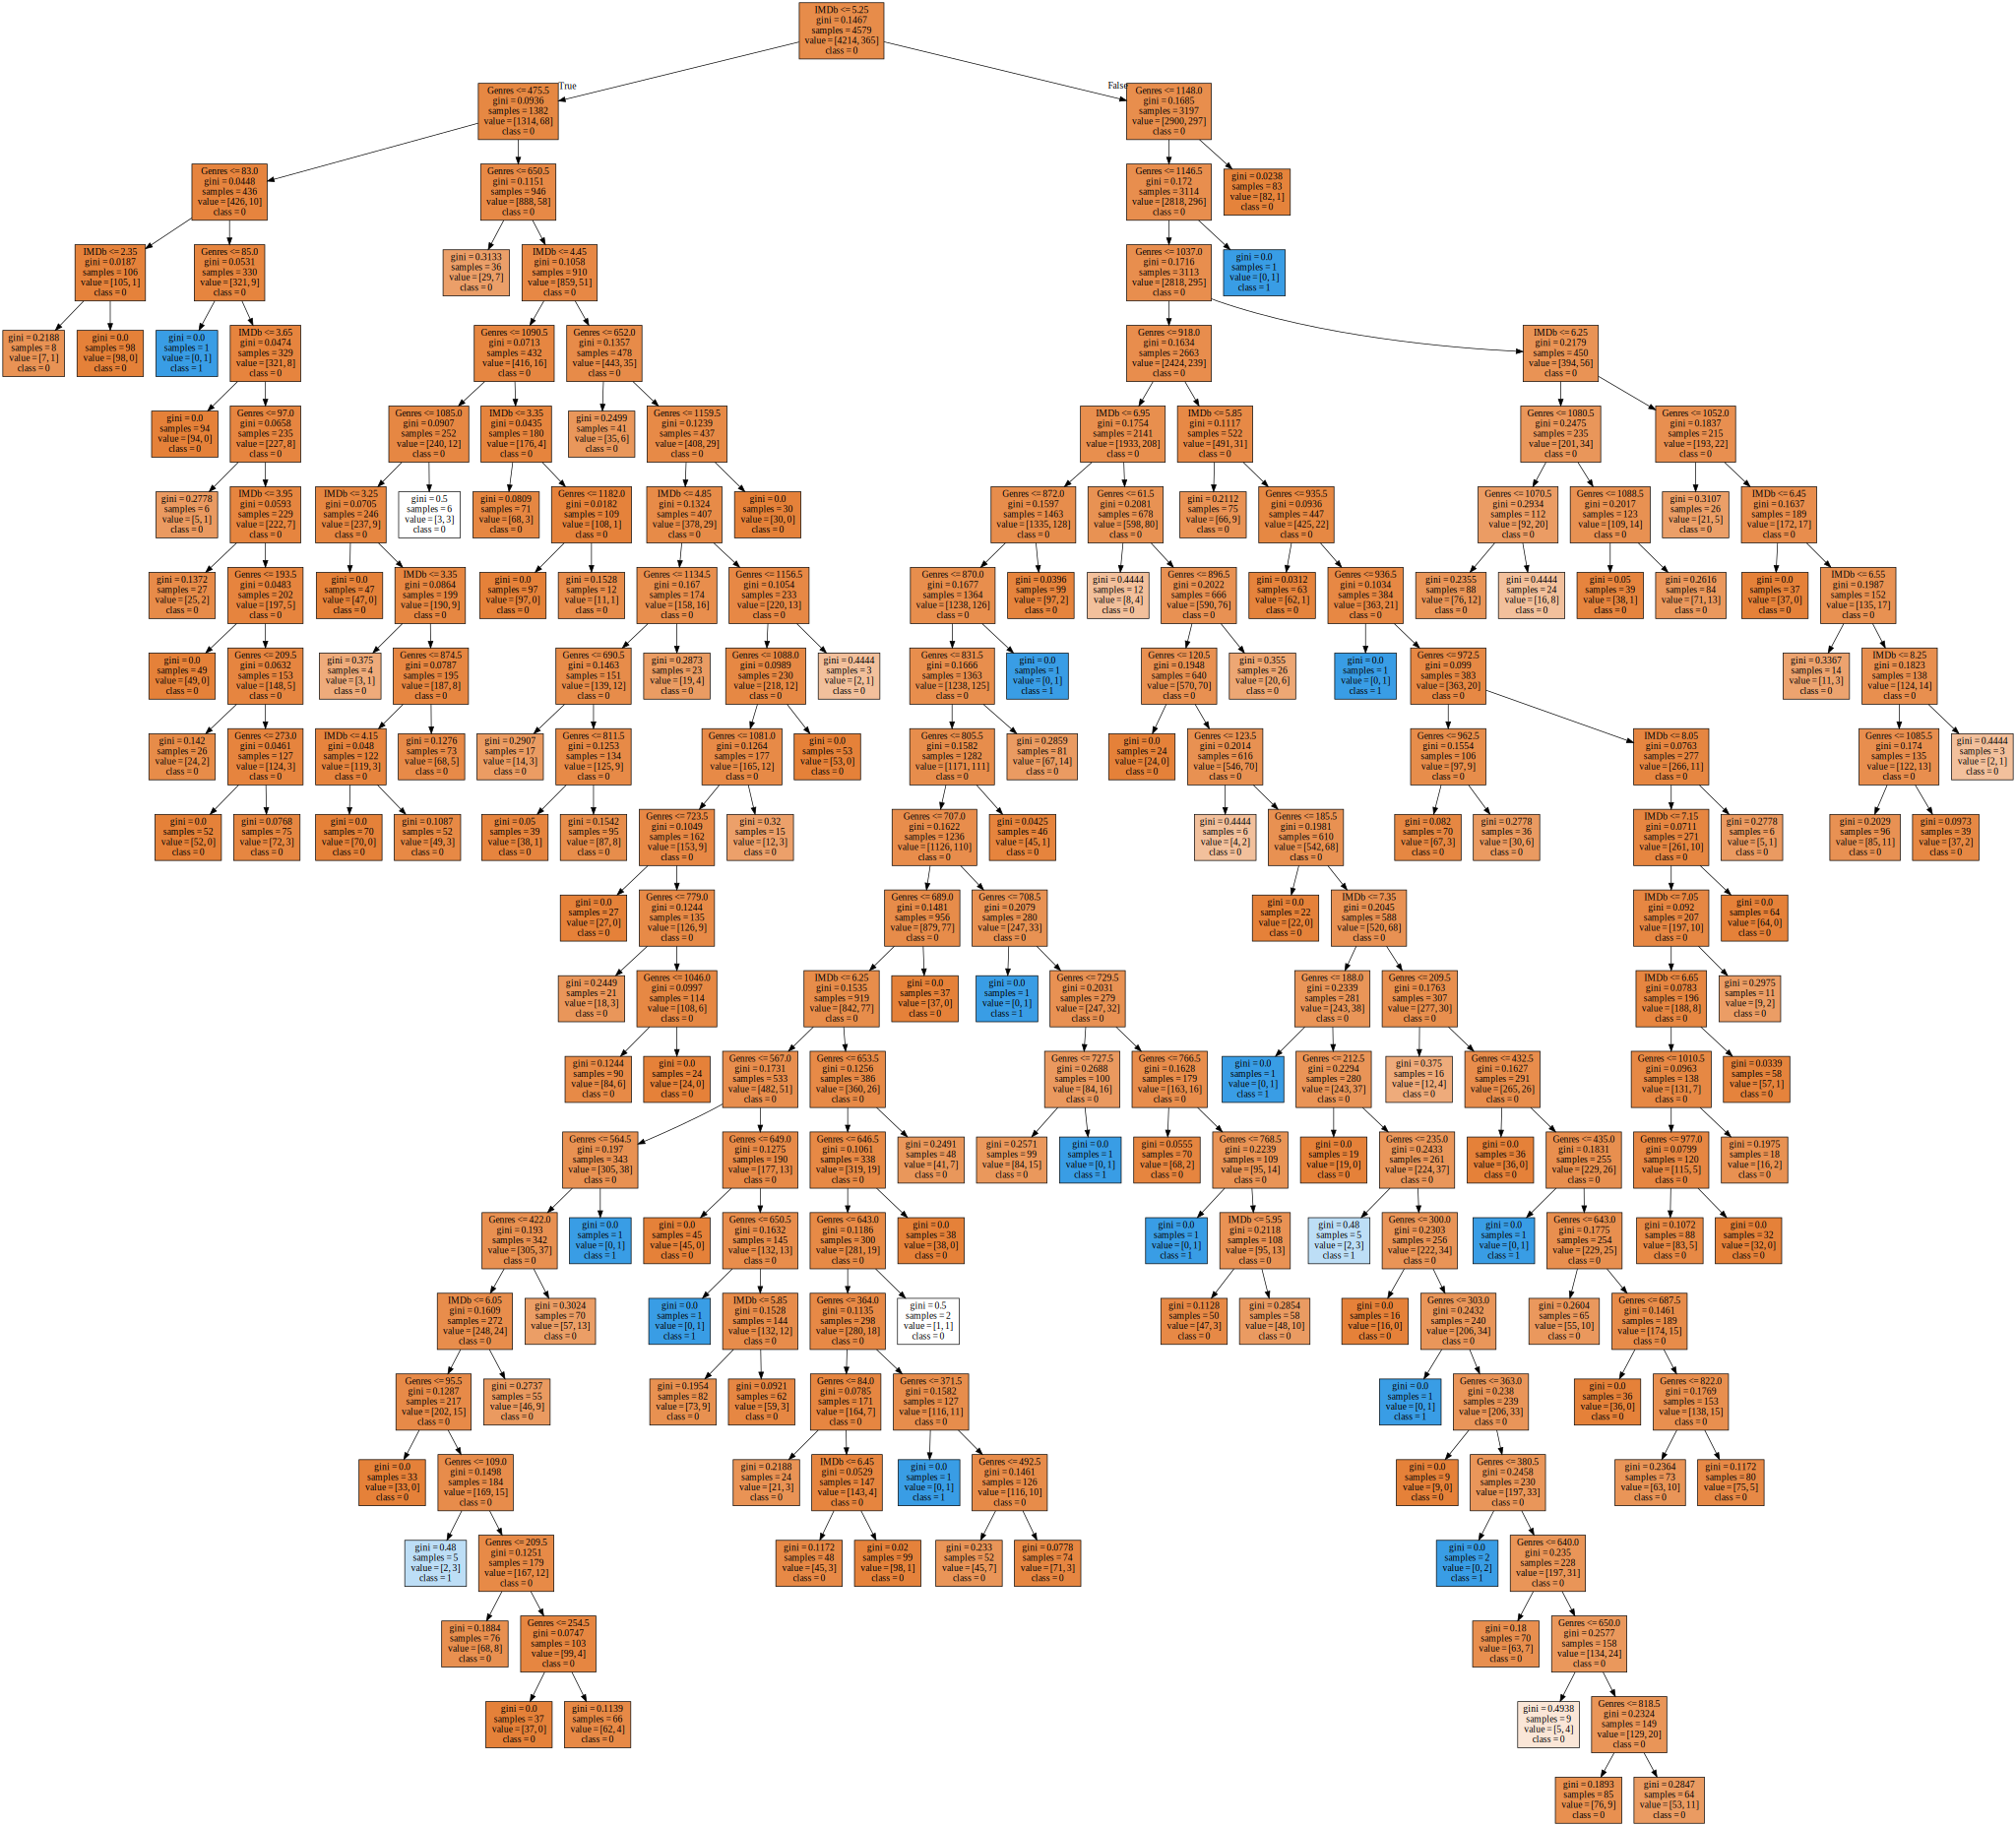

In [383]:
dot_data = tree.export_graphviz(tree1,feature_names = X_train.columns,class_names=["0","1"], filled=True, precision=4)
graph = graphviz.Source(dot_data, format="png") 
graph

In [384]:
train_score_1 = accuracy_score(y_train, y_pred_t1)*100
train_score_1

92.40008735531775

In [385]:
train_score_2 = accuracy_score(y_train, y_pred_t2)*100
train_score_2

92.40008735531775

In [332]:
test_score_1 = accuracy_score(y_test, y_pred1)*100
test_score_1

91.08228617754357

In [333]:
test_score_2 = accuracy_score(y_test, y_pred2)*100
test_score_2

91.08228617754357

In [334]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2265
           1       0.00      0.00      0.00       202

    accuracy                           0.91      2467
   macro avg       0.46      0.50      0.48      2467
weighted avg       0.84      0.91      0.88      2467



In [335]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2265
           1       0.00      0.00      0.00       202

    accuracy                           0.91      2467
   macro avg       0.46      0.50      0.48      2467
weighted avg       0.84      0.91      0.88      2467



In [336]:
cm1 = confusion_matrix(y_test, y_pred1)
cm1

array([[2247,   18],
       [ 202,    0]], dtype=int64)

Q. Predict what types of movie should be released that will have a higher chance to be viewed.

Representation of Genres anf Platforms

In [337]:
Netflix_Genres = Netflix_data.Genres.value_counts().head(10)

Prime_Genres = Prime_data.Genres.value_counts().head(10)

Hotstar_Genres = Disney_data.Genres.value_counts().head(10)

Hulu_Genres = Hulu_data.Genres.value_counts().head(10)

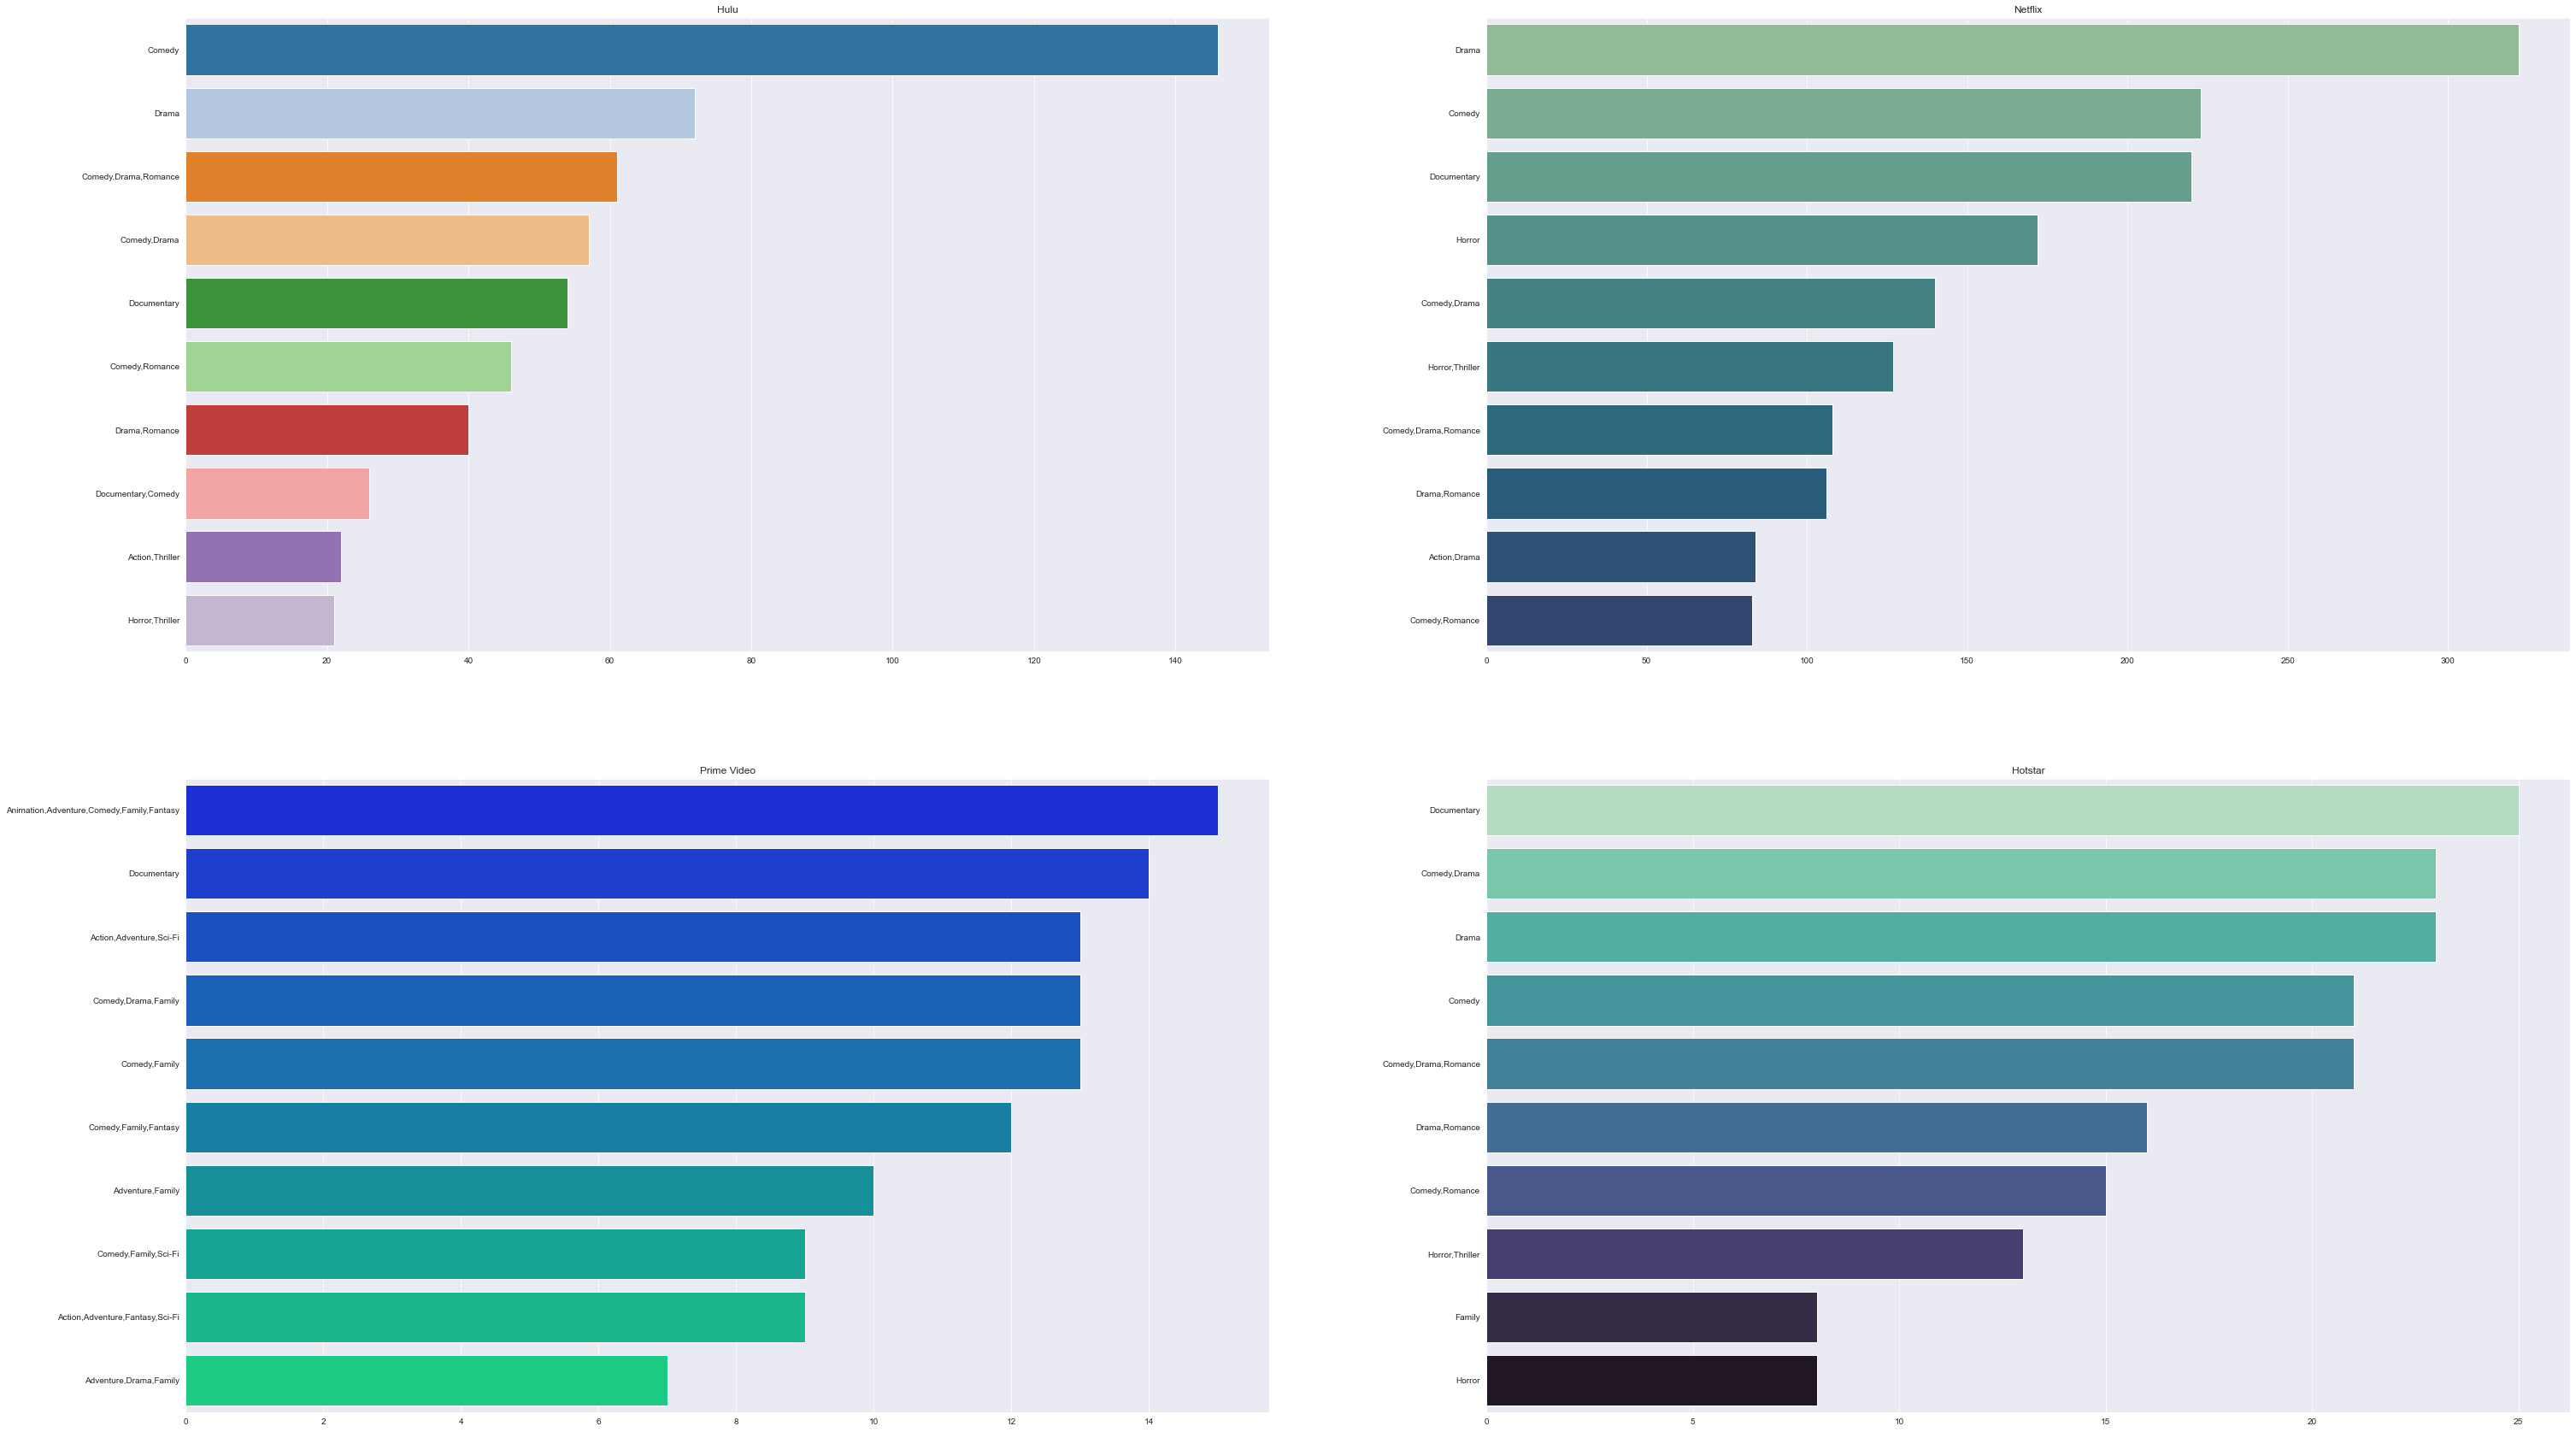

In [338]:
fig, axes = plt.subplots(2,2, figsize=(50,30))


axes[0,0].set_title('Hulu')
axes[0,1].set_title('Netflix')
axes[1,0].set_title('Prime Video')
axes[1,1].set_title('Hotstar')

sns.barplot(x=Netflix_Genres.values, y=Netflix_Genres.index, ax=axes[0,0], palette='tab20')
sns.barplot(x=Prime_Genres.values, y=Prime_Genres.index, ax=axes[0,1], palette='crest')
sns.barplot(x=Hotstar_Genres.values, y=Hotstar_Genres.index, ax=axes[1,0], palette='winter')
sns.barplot(x=Hulu_Genres.values, y=Hulu_Genres.index, ax=axes[1,1],palette='mako_r')
plt.show()

Predict what types of movie should be released that will 
have a higher chance to be viewed.

q. Help the investors for the business start-ups for the video streaming platforms.